In [684]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])


In [685]:
#r_off

L_sensor = 17 *1e-3
profundidade = 7.75 *1e-3

r_off = L_sensor/2 + profundidade/2
r_off_err = 0.05 *1e-3

print(f'r_off = ({r_off * 1e3} +- {r_off_err * 1e3}) mm')

#V_fundo

V_fundo = -0.7 *1e-3
V_fundo_err = 0.1*1e-3

r_off = (12.375 +- 0.05) mm


In [686]:
#Dados

r = np.array([0,1,2,3,4,5,6,7,8,9,10]) * 1e-2 - 2.5*1e-3
r += r_off
r_err = 0.05 *1e-2

V_1 = np.array([-123.5, -69.0, -43.7, -30.4, -23.0, -18.3, -15.5, -13.2, -11.5, -10.2, -9.2])*1e-3 - V_fundo
V_2 = np.array([51.4, 26.3, 16.0, 11.7, 8.8, 7.1, 5.8, 4.9, 4.1, 3.6, 3.0])*1e-3 - V_fundo

V_err = 0.1*1e-3 + V_fundo_err

In [687]:
#Converter para Campo Magnético

A = 0.003472442866550257
A_err = 2.6927087730399573*1e-05

B_1 = V_1 * A
B_1_err = A*V_err + np.abs(V_1)*A_err

B_2 = V_2 * A
B_2_err = A*V_err + V_2*A_err

In [688]:
#Modelos teóricos
N=30
mu = 4*np.pi *1e-7
L = 100

def B(r, I):
    return mu * I * N / (2* np.pi * r)  * (L/np.sqrt(L**2 + 4*r**2)) - mu * I * N / (2* np.pi * (r-L))  * (L/np.sqrt(L**2 + 4*(r-L)**2))

I_1 = -1
I_2 = 0.5

#I_1 = -1*0.7
#I_2 = 0.3

r_t = np.linspace(r[0], r[-1], 500)
    

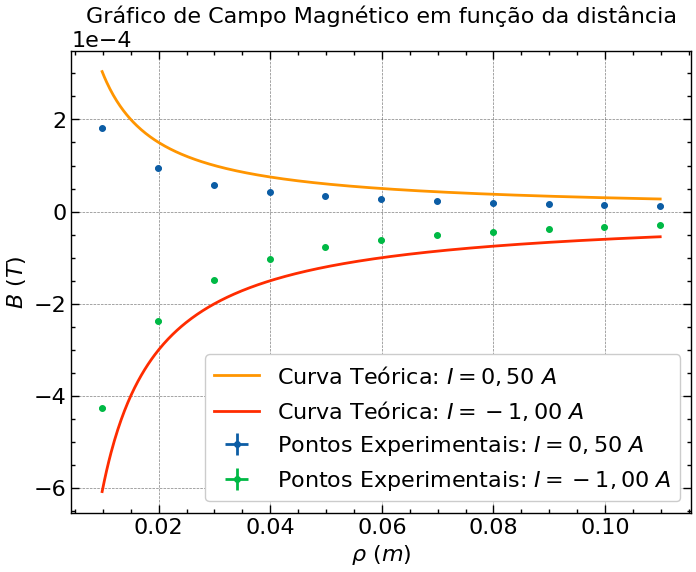

In [689]:
plt.errorbar(r, B_2, xerr=r_err, yerr= B_2_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais: $I = 0,50 \ A$')
plt.errorbar(r, B_1, xerr=r_err, yerr= B_1_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais: $I = -1,00 \ A$')

plt.plot(r_t, B(r_t, I_2), label = 'Curva Teórica: $I = 0,50 \ A$')
plt.plot(r_t, B(r_t, I_1), label = 'Curva Teórica: $I = -1,00 \ A$')

plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.xlabel(r"$\rho \ (m)$")
plt.ylabel(r"$B \ (T)$")
plt.title("Gráfico de Campo Magnético em função da distância")

plt.legend()